In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

In [89]:
trans_data = pd.read_excel('ANZ_transactions.xlsx')

In [90]:
trans_data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,trans_month
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,August
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,August
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,August
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,August
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,August


In [91]:
trans_data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [6]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 24 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [7]:
trans_data.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [8]:
trans_data.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [9]:
np.unique(trans_data['card_present_flag'])

array([ 0.,  1., nan, ..., nan, nan, nan])

In [10]:
trans_data.bpay_biller_code.value_counts()

0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64

In [11]:
trans_data.account.value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

In [12]:
np.unique(trans_data['account'])

array(['ACC-1037050564', 'ACC-1056639002', 'ACC-1199531521',
       'ACC-1217063613', 'ACC-1222300524', 'ACC-1243371644',
       'ACC-1279356312', 'ACC-1334819143', 'ACC-1344825761',
       'ACC-1349834573', 'ACC-1424176027', 'ACC-1438600314',
       'ACC-1443681913', 'ACC-1496451953', 'ACC-1516130869',
       'ACC-1523339231', 'ACC-154431271', 'ACC-1598451071',
       'ACC-1608363396', 'ACC-1650504218', 'ACC-1652235822',
       'ACC-1683215619', 'ACC-1710017148', 'ACC-1788473090',
       'ACC-1799207998', 'ACC-182446574', 'ACC-1890605467',
       'ACC-1903037542', 'ACC-1973887809', 'ACC-1990648130',
       'ACC-1998563091', 'ACC-2014856841', 'ACC-2107684084',
       'ACC-211792489', 'ACC-2153562714', 'ACC-2171593283',
       'ACC-2173390920', 'ACC-2231965366', 'ACC-2249586092',
       'ACC-2259139624', 'ACC-2265520058', 'ACC-2270192619',
       'ACC-2305712452', 'ACC-240804743', 'ACC-2528867619',
       'ACC-2615038700', 'ACC-2650850707', 'ACC-2673069055',
       'ACC-2674800293', 'AC

In [13]:
trans_data.currency.value_counts()

AUD    12043
Name: currency, dtype: int64

In [14]:
np.unique(trans_data['currency'])

array(['AUD'], dtype=object)

In [15]:
trans_data.long_lat.value_counts()

153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64

In [16]:
np.unique(trans_data['long_lat'])

array(['114.62 -28.80', '115.72 -32.28', '115.74 -31.72', '115.78 -31.90',
       '115.79 -31.79', '115.79 -31.94', '115.81 -31.82', '115.83 -31.90',
       '115.90 -31.92', '115.98 -32.07', '116.00 -31.88', '116.02 -31.87',
       '116.06 -32.00', '121.48 -30.75', '130.84 -12.45', '130.90 -12.37',
       '130.98 -12.49', '138.52 -35.01', '138.56 -35.27', '138.58 -34.96',
       '138.61 -34.89', '138.63 -34.93', '138.67 -34.86', '138.69 -34.84',
       '142.77 -37.06', '143.83 -37.66', '143.88 -37.66', '144.66 -37.91',
       '144.71 -37.58', '144.79 -37.73', '144.89 -37.69', '144.89 -37.81',
       '144.93 -37.79', '144.95 -37.76', '144.96 -37.69', '144.96 -37.76',
       '144.96 -37.84', '144.97 -37.42', '144.98 -37.84', '144.99 -37.90',
       '145.00 -37.83', '145.01 -37.93', '145.03 -37.88', '145.03 -37.91',
       '145.04 -37.85', '145.04 -37.92', '145.06 -37.95', '145.09 -37.82',
       '145.13 -37.70', '145.15 -37.76', '145.16 -37.84', '145.17 -37.84',
       '145.18 -37.90', '

In [17]:
trans_data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [18]:
np.unique(trans_data['txn_description'])

array(['INTER BANK', 'PAY/SALARY', 'PAYMENT', 'PHONE BANK', 'POS',
       'SALES-POS'], dtype=object)

In [19]:
trans_data.merchant_id.value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
66fe63d2-2e6a-416b-b094-8b7971299ec1     1
d9e7e5fb-2a7c-47b1-86a0-0bdbc4e59a66     1
fb5eebd0-40bd-4dbf-b74e-3a0569d6f188     1
5de37acb-2c49-4023-9a6c-c460d60d3574     1
963f436b-358e-4976-8871-7c48bbf0b435     1
Name: merchant_id, Length: 5725, dtype: int64

In [20]:
trans_data.merchant_code.value_counts()

0.0    883
Name: merchant_code, dtype: int64

In [21]:
np.unique(trans_data['merchant_code'])

array([ 0., nan, nan, ..., nan, nan, nan])

In [22]:
np.unique(trans_data['first_name'])

array(['Abigail', 'Alexander', 'Amy', 'Andrew', 'Antonio', 'Ashley',
       'Barry', 'Billy', 'Brian', 'Catherine', 'Charles', 'Christine',
       'Christopher', 'Cindy', 'Craig', 'Daniel', 'Darren', 'David',
       'Debra', 'Derek', 'Diana', 'Donald', 'Dustin', 'Edward',
       'Elizabeth', 'Emily', 'Eric', 'Fernando', 'Gregory', 'Heather',
       'Isaiah', 'Jacqueline', 'James', 'Jeffrey', 'Jessica', 'Jonathan',
       'Joseph', 'Kaitlyn', 'Karen', 'Kenneth', 'Kimberly', 'Kristin',
       'Linda', 'Lori', 'Lucas', 'Luis', 'Mackenzie', 'Maria', 'Marissa',
       'Mary', 'Matthew', 'Melissa', 'Michael', 'Michele', 'Michelle',
       'Natasha', 'Nathaniel', 'Patrick', 'Paul', 'Rachael', 'Renee',
       'Rhonda', 'Richard', 'Ricky', 'Robert', 'Robin', 'Ronald', 'Ruth',
       'Ryan', 'Sandra', 'Sarah', 'Scott', 'Stephanie', 'Susan',
       'Tiffany', 'Tim', 'Timothy', 'Tonya', 'Tyler', 'Virginia'],
      dtype=object)

In [23]:
np.unique(trans_data['balance'])

array([2.4000000e-01, 2.5000000e-01, 9.8000000e-01, ..., 2.6705066e+05,
       2.6709366e+05, 2.6712852e+05])

In [24]:
trans_data.balance.dtype

dtype('float64')

In [25]:
trans_data.gender.value_counts()

M    6285
F    5758
Name: gender, dtype: int64

In [26]:
np.unique(trans_data['gender'])

array(['F', 'M'], dtype=object)

In [27]:
trans_data.gender.dtype

dtype('O')

In [28]:
np.unique(trans_data['age'])

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35,
       37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 50, 52, 53, 64, 69, 78],
      dtype=int64)

In [29]:
trans_data.merchant_suburb.value_counts()

Melbourne           255
Sydney              233
Southport            82
Brisbane City        79
Chatswood            55
                   ... 
Mooloolah Valley      1
Forest Lake           1
Duaringa              1
South Turramurra      1
Oakleigh South        1
Name: merchant_suburb, Length: 1609, dtype: int64

In [30]:
trans_data.merchant_suburb.dtype

dtype('O')

In [31]:
trans_data.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [32]:
trans_data.extraction.value_counts()

2018-09-03T11:00:00.000+0000    10
2018-10-02T17:00:00.000+0000     9
2018-10-23T17:00:00.000+0000     9
2018-08-07T17:00:00.000+0000     9
2018-10-01T11:00:00.000+0000     9
                                ..
2018-09-14T16:37:02.000+0000     1
2018-09-20T17:53:11.000+0000     1
2018-09-07T08:22:29.000+0000     1
2018-10-06T23:35:47.000+0000     1
2018-08-02T22:56:28.000+0000     1
Name: extraction, Length: 9442, dtype: int64

In [33]:
np.unique(trans_data['extraction'])

array(['2018-08-01T01:01:15.000+0000', '2018-08-01T01:13:45.000+0000',
       '2018-08-01T01:26:15.000+0000', ...,
       '2018-10-31T23:34:25.000+0000', '2018-10-31T23:47:05.000+0000',
       '2018-10-31T23:59:44.000+0000'], dtype=object)

In [34]:
np.unique(trans_data['amount'])

array([1.00000e-01, 7.60000e-01, 1.52000e+00, ..., 6.10723e+03,
       7.08109e+03, 8.83598e+03])

In [35]:
trans_data.amount.dtype

dtype('float64')

In [36]:
trans_data.country.value_counts()

Australia    12043
Name: country, dtype: int64

In [37]:
np.unique(trans_data['country'])

array(['Australia'], dtype=object)

In [38]:
trans_data.merchant_long_lat.value_counts()

151.21 -33.87    145
144.96 -37.82     85
144.97 -37.81     59
144.96 -37.81     56
153.02 -27.47     46
                ... 
153.21 -27.57      1
144.93 -37.81      1
151.77 -32.93      1
151.1 -34.03       1
144.96 -37.7       1
Name: merchant_long_lat, Length: 2703, dtype: int64

In [39]:
trans_data.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [40]:
np.unique(trans_data['movement'])

array(['credit', 'debit'], dtype=object)

In [41]:
trans_data.trans_month.value_counts()

October      4087
September    4013
August       3943
Name: trans_month, dtype: int64

In [42]:
np.unique(trans_data['trans_month'])

array(['August', 'October', 'September'], dtype=object)

In [43]:
trans_data.isnull().mean()

status               0.000000
card_present_flag    0.359213
bpay_biller_code     0.926513
account              0.000000
currency             0.000000
long_lat             0.000000
txn_description      0.000000
merchant_id          0.359213
merchant_code        0.926679
first_name           0.000000
balance              0.000000
date                 0.000000
gender               0.000000
age                  0.000000
merchant_suburb      0.359213
merchant_state       0.359213
extraction           0.000000
amount               0.000000
transaction_id       0.000000
country              0.000000
customer_id          0.000000
merchant_long_lat    0.359213
movement             0.000000
trans_month          0.000000
dtype: float64

In [92]:
trans_data.drop(['merchant_code'], axis = 1, inplace = True)

In [93]:
trans_data.drop(['bpay_biller_code'], axis = 1, inplace = True)

In [94]:
trans_data.drop(['card_present_flag', ], axis = 1, inplace = True)

In [95]:
trans_data.drop(['merchant_id'], axis = 1, inplace = True)

In [96]:
trans_data.isnull().mean()

status               0.000000
account              0.000000
currency             0.000000
long_lat             0.000000
txn_description      0.000000
first_name           0.000000
balance              0.000000
date                 0.000000
gender               0.000000
age                  0.000000
merchant_suburb      0.359213
merchant_state       0.359213
extraction           0.000000
amount               0.000000
transaction_id       0.000000
country              0.000000
customer_id          0.000000
merchant_long_lat    0.359213
movement             0.000000
trans_month          0.000000
dtype: float64

In [97]:
trans_data['merchant_suburb'].fillna(trans_data['merchant_suburb'].mode()[0], inplace = True)

In [98]:
trans_data['merchant_state'].fillna(trans_data['merchant_state'].mode()[0], inplace = True)

In [99]:
trans_data.isnull().mean()

status               0.000000
account              0.000000
currency             0.000000
long_lat             0.000000
txn_description      0.000000
first_name           0.000000
balance              0.000000
date                 0.000000
gender               0.000000
age                  0.000000
merchant_suburb      0.000000
merchant_state       0.000000
extraction           0.000000
amount               0.000000
transaction_id       0.000000
country              0.000000
customer_id          0.000000
merchant_long_lat    0.359213
movement             0.000000
trans_month          0.000000
dtype: float64

In [100]:
trans_data.drop(['merchant_long_lat'], axis = 1, inplace = True)

In [101]:
trans_data.isnull().sum()

status             0
account            0
currency           0
long_lat           0
txn_description    0
first_name         0
balance            0
date               0
gender             0
age                0
merchant_suburb    0
merchant_state     0
extraction         0
amount             0
transaction_id     0
country            0
customer_id        0
movement           0
trans_month        0
dtype: int64

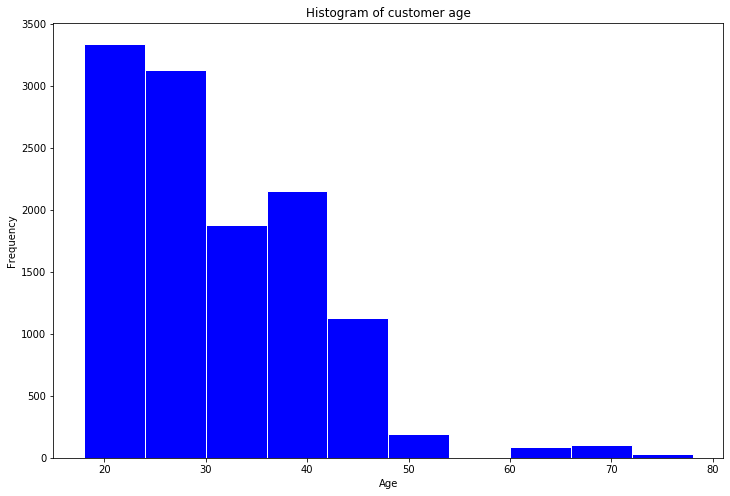

In [102]:
plt.figure(figsize = (12,8))
plt.hist(trans_data['age'], color = 'blue', edgecolor = 'white', bins = 10)
plt.title('Histogram of customer age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age.png')

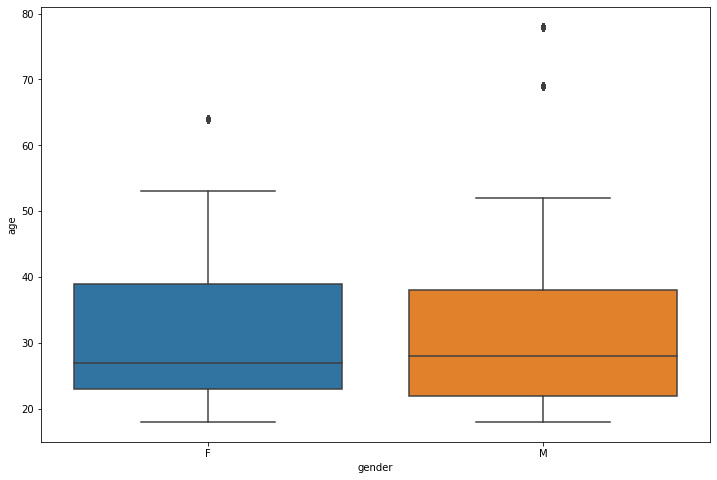

In [104]:
plt.figure(figsize = (12,8))
sn.boxplot(x = trans_data['gender'], y = trans_data['age'])
plt.savefig('age-boxplot.png')

In [98]:
trans_data['age'].value_counts()

26    893
38    767
20    765
21    733
24    732
40    704
19    693
34    537
25    515
30    499
43    473
35    444
27    443
18    442
28    414
22    399
23    309
39    283
37    276
31    255
42    232
44    160
46    153
33    139
29    134
41    121
47    110
69    102
64     88
52     77
53     73
50     44
78     34
Name: age, dtype: int64

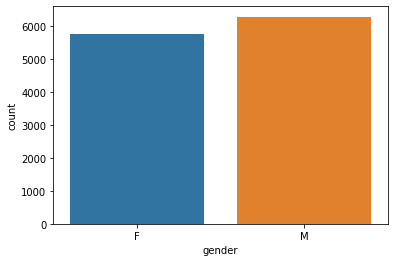

In [79]:
sn.countplot(x = 'gender', data = trans_data)

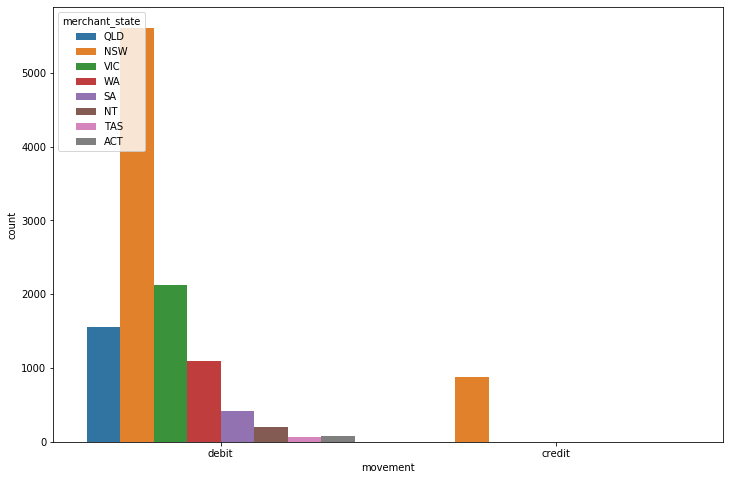

In [85]:
plt.figure(figsize = (12, 8))
sn.countplot(x = 'movement', data = trans_data, hue = 'merchant_state')

### Average amount spent by a customer per month

In [73]:
avg_amount_per_month = trans_data.groupby('trans_month')
aa = avg_amount_per_month['amount'].agg(np.mean)
print(aa)

trans_month
August       185.121867
October      196.427323
September    182.045903
Name: amount, dtype: float64


### Average amount spent by a customers per state 

In [72]:
avg_amount_per_state = trans_data.groupby('merchant_state')
bb = avg_amount_per_state['amount'].agg(np.mean)
print(bb)

merchant_state
ACT     66.803836
NSW    316.464915
NT      44.726293
QLD     34.372397
SA      40.425470
TAS     28.866618
VIC     41.099953
WA      30.901873
Name: amount, dtype: float64


### Number of transactions per month

In [71]:
trans_per_month = trans_data.groupby('trans_month')
cc = trans_per_month['transaction_id'].count()
print(cc)

trans_month
August       3943
October      4087
September    4013
Name: transaction_id, dtype: int64


### Number of transactions based on gender

In [70]:
trans_per_gender = trans_data.groupby('gender')
dd = trans_per_gender['transaction_id'].count()
print(dd)

gender
F    5758
M    6285
Name: transaction_id, dtype: int64


### Number of transactions made by each customer per month

In [95]:
trans_cust_per_month = trans_data.groupby(['customer_id', 'trans_month'])
hh = trans_cust_per_month['transaction_id'].count()
print(hh)

customer_id     trans_month
CUS-1005756958  August         50
                October         9
                September      14
CUS-1117979751  August         43
                October        32
                               ..
CUS-880898248   October        29
                September      17
CUS-883482547   August         61
                October        59
                September      58
Name: transaction_id, Length: 300, dtype: int64


### Average amount spent based on gender

In [69]:
avg_amount_gender = trans_data.groupby('gender')
ee = avg_amount_gender['amount'].agg(np.mean)
print(ee)

gender
F    168.517303
M    205.721809
Name: amount, dtype: float64


### Number of transactions per merchant city

In [68]:
trans_merchant_sub = trans_data.groupby('merchant_suburb')
ff = trans_merchant_sub['transaction_id'].count()
print(ff)

merchant_suburb
Abbotsford        5
Aberdeen          2
Aberfeldie        1
Aberfoyle Park    2
Acacia Ridge      1
                 ..
Yulara            1
Yungaburra        3
Zetland           3
Zillmere          1
Zuccoli           2
Name: transaction_id, Length: 1609, dtype: int64


### Average amount spent per merchant city

In [67]:
avg_trans_merchant_sub = trans_data.groupby('merchant_suburb')
gg = avg_trans_merchant_sub['amount'].agg(np.mean)
print(gg)

merchant_suburb
Abbotsford        400.858000
Aberdeen           26.225000
Aberfeldie         57.770000
Aberfoyle Park     42.460000
Acacia Ridge       10.300000
                     ...    
Yulara             80.070000
Yungaburra         35.126667
Zetland            26.156667
Zillmere           38.630000
Zuccoli            39.675000
Name: amount, Length: 1609, dtype: float64


In [101]:
segment_data = trans_data.groupby('date')
segment_data.head(10)

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,trans_month
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,August
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,August
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,August
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,August
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11907,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,1382.35,2018-10-31,F,26,Elsternwick,VIC,2018-10-31T04:15:51.000+0000,33.51,a7711333efb1487da79d1c7d712d7ec1,Australia,CUS-2487424745,145 -37.89,debit,October
11908,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,1379.59,2018-10-31,F,26,Southport,QLD,2018-10-31T04:50:20.000+0000,2.76,685308084eb644aea61724486d9ebfa6,Australia,CUS-2487424745,153.41 -27.97,debit,October
11909,posted,ACC-602667573,AUD,151.23 -33.96,INTER BANK,Michael,23943.97,2018-10-31,M,40,Melbourne,NSW,2018-10-31T06:00:00.000+0000,21.00,7deec725aba54be8b1a6b9a91028a675,Australia,CUS-2031327464,NaN,debit,October
11910,posted,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,Fernando,17399.93,2018-10-31,M,19,Melbourne,NSW,2018-10-31T06:00:00.000+0000,27.00,b24c76d858c84c0194607356219fcbca,Australia,CUS-2317998716,NaN,debit,October


### Task 2 - Predictive Analytics

In [102]:
trans_data.shape

(12043, 19)

In [103]:
trans_data['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [104]:
new = trans_data[trans_data['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()

In [105]:
new.head()

,balance,age,amount
customer_id,,,
CUS-1005756958,4718.665385,53,970.47
CUS-1117979751,11957.202857,21,3578.65
CUS-1140341822,5841.720000,28,1916.51
CUS-1147642491,8813.467692,34,1711.39
CUS-1196156254,23845.717143,34,3903.73


In [106]:
salaries = []

for customer_id in trans_data['customer_id']:
    salaries.append(int(new.loc[customer_id]['amount']))

trans_data['annual_salary'] = salaries

In [107]:
trans_data.head()

,status,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,trans_month,annual_salary
0,authorized,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,August,1013
1,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,August,1013
2,authorized,ACC-1222300524,AUD,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,debit,August,1002
3,authorized,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,debit,August,892
4,authorized,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,debit,August,1013


In [108]:
trans_corr = trans_data.corr()
trans_corr['annual_salary'].sort_values(ascending = False)

annual_salary    1.000000
balance          0.258148
amount           0.056421
age             -0.083823
Name: annual_salary, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016B872B1148>,
      dtype=object)

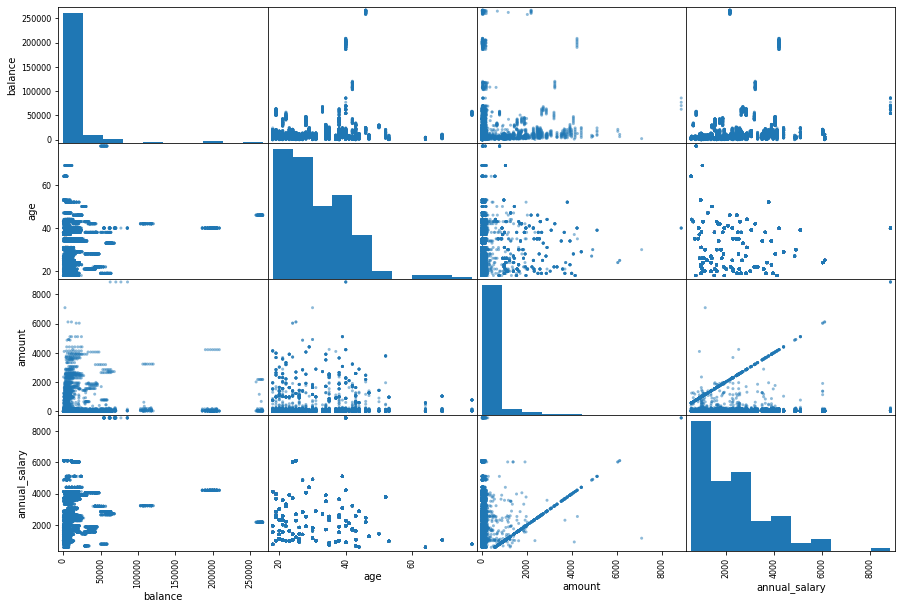

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(trans_data, figsize = (15,10))

<Figure size 864x576 with 0 Axes>

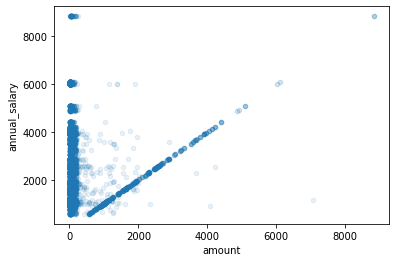

In [69]:
plt.figure(figsize = (12,8))
trans_data.plot(kind = 'scatter', x = 'amount', y = 'annual_salary', alpha = 0.1)

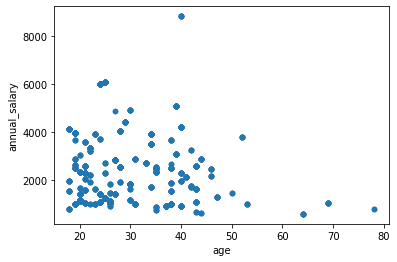

In [70]:
trans_data.plot(kind = 'scatter', x = 'age', y = 'annual_salary', alpha = 0.1)

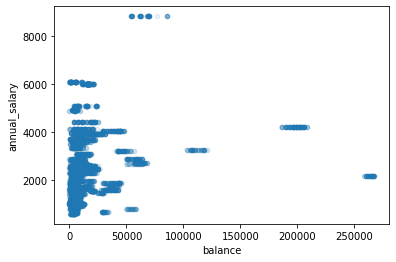

In [71]:
trans_data.plot(kind = 'scatter', x = 'balance', y = 'annual_salary', alpha = 0.1)

In [73]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 20 columns):
status             12043 non-null object
account            12043 non-null object
currency           12043 non-null object
long_lat           12043 non-null object
txn_description    12043 non-null object
first_name         12043 non-null object
balance            12043 non-null float64
date               12043 non-null datetime64[ns]
gender             12043 non-null object
age                12043 non-null int64
merchant_suburb    12043 non-null object
merchant_state     12043 non-null object
extraction         12043 non-null object
amount             12043 non-null float64
transaction_id     12043 non-null object
country            12043 non-null object
customer_id        12043 non-null object
movement           12043 non-null object
trans_month        12043 non-null object
annual_salary      12043 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(15)
mem

In [109]:
trans_data.drop(['date'], axis = 1, inplace = True)

In [124]:
data_labels = trans_data['annual_salary'].copy()
trans_data = trans_data.drop(['annual_salary'], axis = 1)

In [125]:
data_cat = trans_data.drop(['balance', 'age', 'amount'], axis = 1) 

In [126]:
data_num = trans_data[['balance', 'age', 'amount']]

In [127]:
data_cat.dtypes

status             object
account            object
currency           object
long_lat           object
txn_description    object
first_name         object
gender             object
merchant_suburb    object
merchant_state     object
extraction         object
transaction_id     object
country            object
customer_id        object
movement           object
trans_month        object
dtype: object

In [128]:
data_num.dtypes

balance    float64
age          int64
amount     float64
dtype: object

In [129]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

data_num_tr = num_pipeline.fit_transform(data_num)

In [130]:
num_attribs = list(data_num)
cat_attribs = list(data_cat)
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [131]:
data_prepared = full_pipeline.fit_transform(trans_data)

In [137]:
train_x, test_x, train_y, test_y = train_test_split(data_prepared, data_labels, test_size = 0.2)

In [138]:
train_x.shape

(9634, 23502)

In [139]:
train_y.shape

(9634,)

In [140]:
test_x.shape

(2409, 23502)

In [141]:
test_y.shape

(2409,)

### Linear Regression

In [177]:
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
predictions = lin_reg.predict(test_x)
predictions

array([1427.86488718, 4893.8720305 , 2611.16653982, ...,  987.55992922,
       2314.49530067,  966.12950299])

In [179]:
lin_mse = mean_squared_error(predictions, test_y)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

14.940652093792469

### Ridge Regression

In [180]:
rid_reg = Ridge(alpha = 1)
rid_reg.fit(train_x, train_y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [181]:
predictions_ridge = rid_reg.predict(test_x)
predictions_ridge

array([1434.05437884, 4882.65900799, 2627.67397884, ...,  988.63664165,
       2319.01546777,  967.15286294])

In [182]:
rid_mse = mean_squared_error(predictions_ridge, test_y)
rid_rmse = np.sqrt(rid_mse)
rid_rmse

23.446584282663782

### Lasso Regression

In [ ]:
las_reg = Lasso(alpha = 0.1)
las_reg.fit(train_x, train_y)

In [ ]:
predictions_las = las_reg.predict(test_x)
predictions_las

In [ ]:
las_mse = mean_squared_error(predictions_las, test_y)
las_rmse = np.sqrt(las_mse)
las_rmse

In [ ]:
some_data = trans_data.iloc[:5]
some_labels = data_labels.iloc[:5]
tr = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(tr))
print('Actual:', list(some_labels))

### Decision Tree Regressor

In [173]:
dec_reg = DecisionTreeRegressor()
dec_reg.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [174]:
predictions_dec = dec_reg.predict(test_x)
predictions_dec

array([1408., 4910., 2588., ...,  990., 2306.,  970.])

In [175]:
some_data = trans_data.iloc[:10]
some_labels = data_labels.iloc[:10]
tr = full_pipeline.transform(some_data)
print('Predictions:', dec_reg.predict(tr))
print('Actual:', list(some_labels))

Predictions: [1013. 1013. 1002.  892. 1013. 2320. 1068. 1068. 2840. 2280.]
Actual: [1013, 1013, 1002, 892, 1013, 2320, 1068, 1068, 2840, 2280]


In [176]:
dec_mse = mean_squared_error(predictions_dec, test_y)
dec_rmse = np.sqrt(dec_mse)
dec_rmse

84.1516821221362